#Digital Image Processing - Image Transformations - 2022.1
##Aluno: Derek Nielsen Araújo Alves - Engenharia de Computação - 17212092
##Professor: Tiago Vieira

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

### (1) Crop and flip an image using Numpy array indexing.


In [2]:
img = cv.imread('rdr.png')
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [3]:
img.shape

(922, 1229, 3)

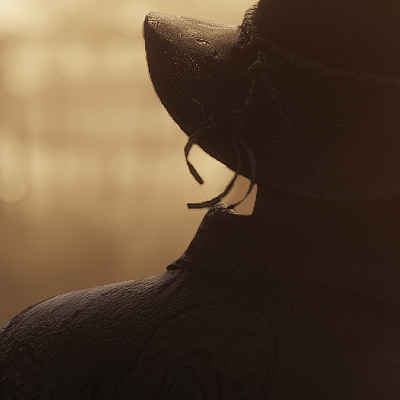

In [4]:
img_arr = np.array(img)
img_arr = img_arr[200:600, 300:700]
cv2_imshow(img_arr)

In [5]:
img_arr = np.array(img)
img_flip = cv.flip(img_arr, 1)
cv2_imshow(img_flip)

Output hidden; open in https://colab.research.google.com to view.

###(2) Implement image translation using Numpy and OpenCV.


In [6]:
h, w = img.shape[:2]

th = h / 4
tw =  w / 4

T = np.float32([[1, 0, -tw], [0, 1, th]])

img_trans = cv.warpAffine(img, T, (w, h))

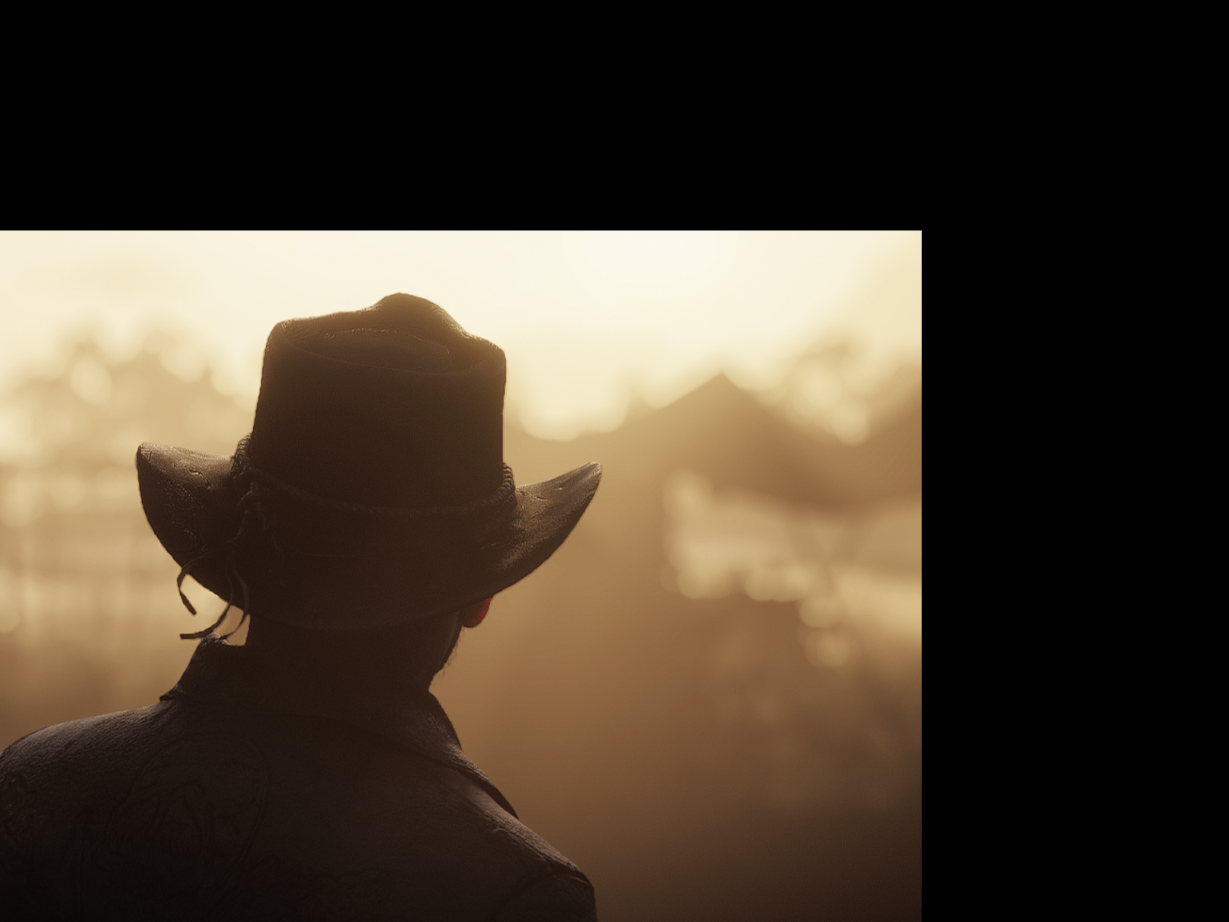

In [7]:
cv2_imshow(img_trans)

###(3) Implement image rotation using Numpy and OpenCV.


In [8]:
img_rot = cv.rotate(img, 2)
cv2_imshow(img_rot)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
img_rot = np.rot90(img, 1)
cv2_imshow(img_rot)

Output hidden; open in https://colab.research.google.com to view.

###(4) Implement image resizing using OpenCV.


In [10]:
h, w = img.shape[:2]
print("Imagem original:", img.shape)
dim = (w//2, h//2)
img_res = cv.resize(img, dim)
print("Imagem com resize:", img_res.shape)

Imagem original: (922, 1229, 3)
Imagem com resize: (461, 614, 3)


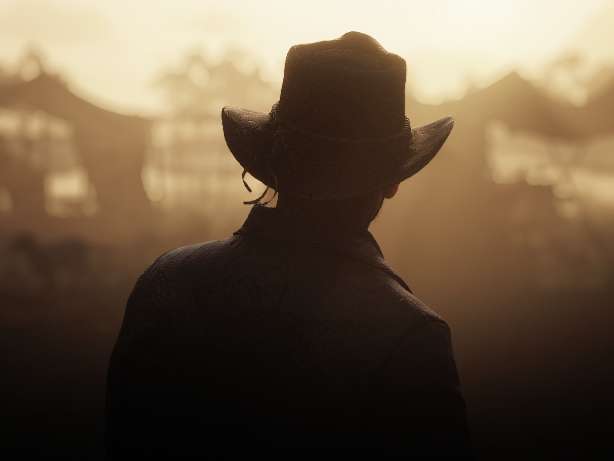

In [11]:
cv2_imshow(img_res)


###(5) Implement bitwise operations: AND, OR, XOR.


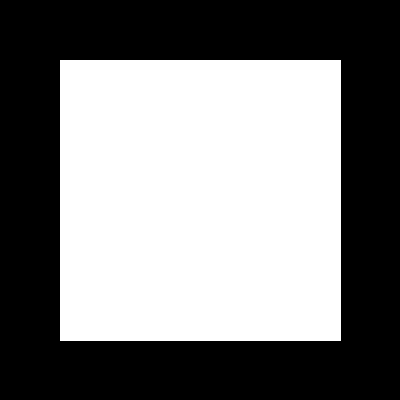

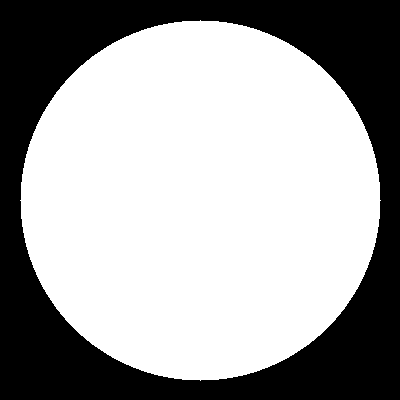

In [12]:
r = cv.rectangle(np.zeros((400, 400), dtype='uint8'), (60, 60), (340, 340), 255, -1)
cv2_imshow(r)
c = cv.circle(np.zeros((400, 400), dtype='uint8'), (200, 200), 180, 255, -1)
cv2_imshow(c)

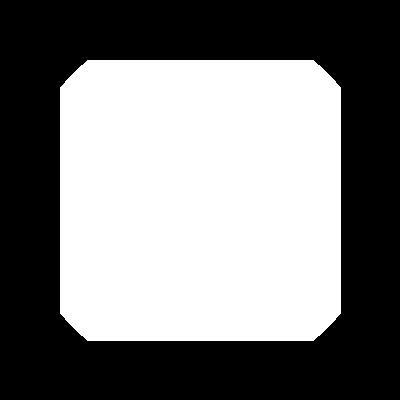

In [13]:
bw_and = cv.bitwise_and(c, r)
cv2_imshow(bw_and)

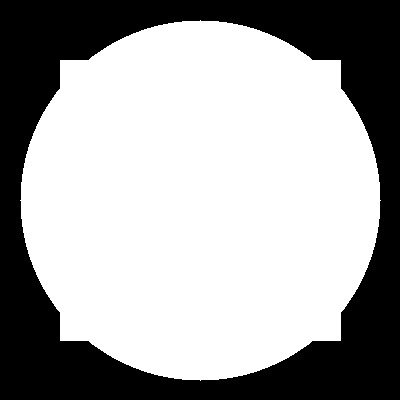

In [14]:
bw_or = cv.bitwise_or(c, r)
cv2_imshow(bw_or)

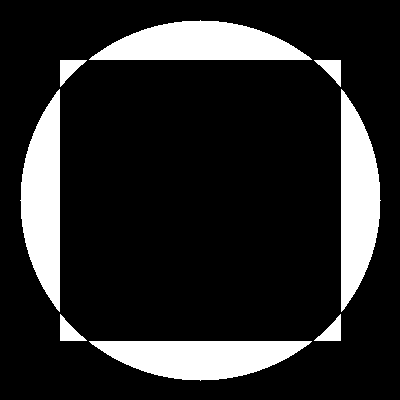

In [15]:
bw_xor = cv.bitwise_xor(c, r)
cv2_imshow(bw_xor)

###(6) Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

In [16]:
img.shape

(922, 1229, 3)

In [21]:
def mask_bw(f, g):
  return cv.bitwise_and(f, g)



IMAGEM PARA A MÁSCARA (ROI WHITE)


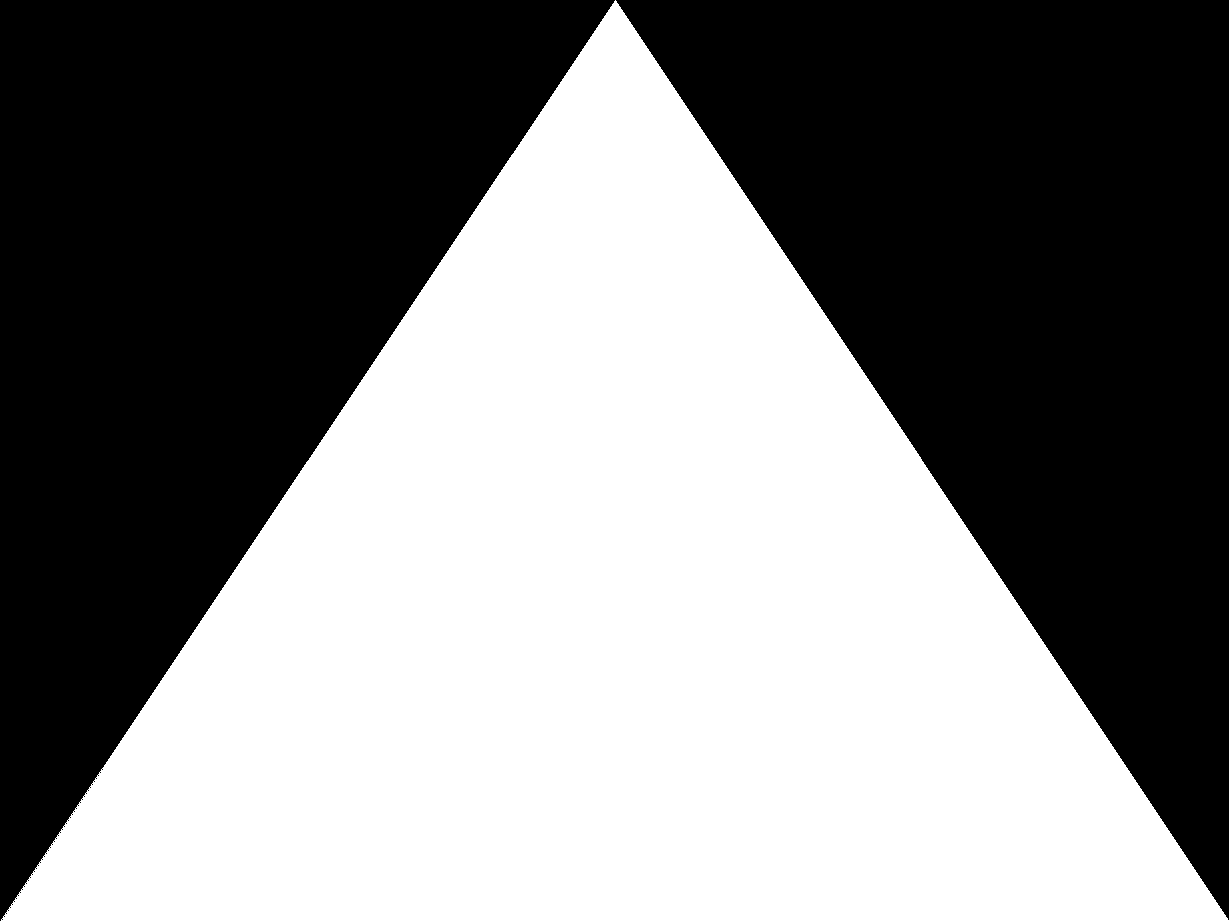

In [27]:
mask = np.zeros((922,1229,3), np.uint8)

pts = np.array([[0,922], [615,0], [1229,922]])
cv.polylines(mask, [pts], True,(0,255,255))
cv.fillPoly(mask, pts = [pts], color =(255,255,255))

print("IMAGEM PARA A MÁSCARA (ROI WHITE)")
cv2_imshow(mask)

IMAGEM APÓS APLICAÇÃO DA MÁSCARA


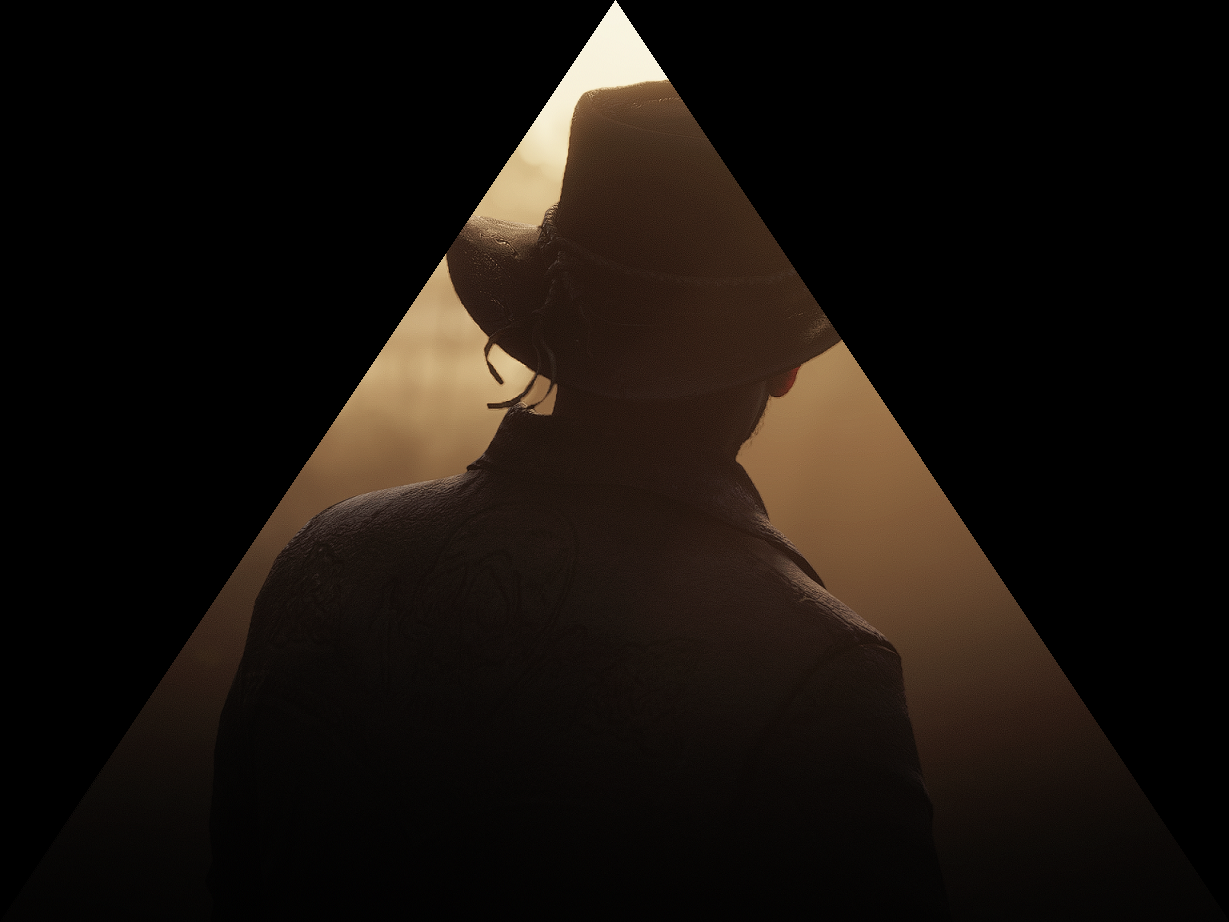

In [26]:
h = mask_bw(img, mask)
print("IMAGEM APÓS APLICAÇÃO DA MÁSCARA")
cv2_imshow(h)